In [68]:
import pandas as pd
import numpy as np

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [69]:
numbers = np.arange(100).tolist()
int_filename = "data_int.txt"
with open(int_filename, 'w') as outfile:
  for number in numbers:
    outfile.write(str(number) + ' ')

!cat data_int.txt # content of data_int.txt

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [70]:
size = 5
numbers = 10 * np.random.random_sample((size, size))
float_filename = "data_float.txt"
with open(float_filename, 'w') as outfile:
  np.savetxt(outfile, numbers, fmt='%.5f')

!cat data_float.txt # content of data_float.txt

7.64887 1.89995 2.12954 0.67656 9.58457
6.03895 0.41409 4.47335 4.72183 3.62881
1.42634 8.73383 9.16744 5.95590 2.16101
8.36395 9.30744 9.02090 0.39518 7.24744
9.84902 2.26185 1.79015 7.85928 2.02473


In [71]:
import csv

csv_filename = "data_float.csv"
lines = []

with open(float_filename, 'r') as infile:
  stripped = (line.strip() for line in infile)
  lines = (line.split(",") for line in stripped if line)
  with open(csv_filename, 'w') as outfile:
      writer = csv.writer(outfile)
      writer.writerows(lines)

!cat data_float.csv # content of data_float.csv

7.64887 1.89995 2.12954 0.67656 9.58457
6.03895 0.41409 4.47335 4.72183 3.62881
1.42634 8.73383 9.16744 5.95590 2.16101
8.36395 9.30744 9.02090 0.39518 7.24744
9.84902 2.26185 1.79015 7.85928 2.02473


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [ ]:
import json
!wget https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json -P data/  

In [105]:
json_filepath="data/user_data.json"
data = json.load(open(json_filepath))
data_AE = [entry for entry in data if entry['CreditCardType'] == 'American Express']

csv_filename = "user_data.csv"
columns=['CreditCard', 'CreditCardType', 'EmailAddress', 'FirstNameLastName', 'ID', 'JobTitle']

with open(csv_filename, 'w') as outfile:
    writer = csv.DictWriter(outfile,
        fieldnames=columns,
        extrasaction='raise')
    writer.writeheader()
    writer.writerows(data_AE)

df = pd.read_csv(csv_filename)
df

,CreditCard,CreditCardType,EmailAddress,FirstNameLastName,ID,JobTitle
0,7083-8766-0251-2345,American Express,Clint_Thorpe5003@bulaffy.com,Clint Thorpe,2,Investment Advisor
1,3657-0088-0820-5247,American Express,Phillip_Carpenter9505@famism.biz,Phillip Carpenter,12,Retail Trainee
2,6718-4818-8011-6024,American Express,Russel_Graves1378@extex.org,Russel Graves,28,Project Manager
3,5438-0816-4166-4847,American Express,Leanne_Newton1268@typill.biz,Leanne Newton,39,Stockbroker
4,8130-3425-7573-7745,American Express,Tony_Giles1960@iatim.tech,Tony Giles,57,Budget Analyst
5,4156-0107-7210-2630,American Express,Owen_Allcott5125@bauros.biz,Owen Allcott,62,CNC Operator
6,7152-3247-6053-2233,American Express,Liam_Lynn3280@kideod.biz,Liam Lynn,68,Project Manager
7,0208-1753-3870-8002,American Express,Regina_Woodcock5820@yahoo.com,Regina Woodcock,74,Dentist
8,4256-7201-6717-4322,American Express,Carter_Wallace9614@atink.com,Carter Wallace,81,HR Specialist
9,3851-1403-1734-6321,American Express,Maia_Stark2797@jiman.org,Maia Stark,92,Staffing Consultant


3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [ ]:
!wget https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv -P data/

In [108]:
csv_filepath = "data/mushrooms_categorized.csv"
df = pd.read_csv(csv_filepath)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [111]:
avg_df = df.groupby('class').mean()
avg_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,1.498099,1.775665,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,0.692543,1.359551,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


In [114]:
json_filename = "mushrooms_categorized.json"
df.to_json(json_filename)

df_json = pd.read_json(json_filename)
df_json

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [ ]:
!wget https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat -P data/  

In [145]:
def get_block(binary_str):
  first_n = chr(int(binary_str[0:6], 2))
  second_n = chr(int(binary_str[6:12], 2))
  third_n = chr(int(binary_str[12:18], 2))
  fourth_n = chr(int(binary_str[18:24], 2))

  block = first_n + second_n + third_n + fourth_n
  return block

def get_ccn(binary_str):
  first_block = get_block(binary_str[0:24])
  second_block = get_block(binary_str[30:54])
  third_block = get_block(binary_str[60:84])
  fourth_block = get_block(binary_str[90:114])

  ccn = first_block + '-' + second_block + '-' + third_block + '-' + fourth_block
  return ccn

csv_filepath = "data/credit_card.dat"
with open(csv_filepath, 'r') as infile:
  data = infile.read()
  lines = data.split('\n')[:-2]

  for line in lines:
    ccn = get_ccn(line)
    print(ccn)

7648-5673-3775-2271
3257-8247-3354-2266
2722-0001-4011-6652
0661-3063-3742-3150
0432-1608-1462-4742
5827-2027-8785-7303
5774-8528-2087-1117
8140-1210-6352-2845
5764-1133-7301-7100
6456-1737-4126-6726
1228-8631-7382-0000
7051-0160-5374-3166
0618-3587-1630-6376
1545-5454-7444-5636
6735-3116-3202-6834
7287-5011-1547-8413
7033-2607-3328-4200
2568-5244-1874-5024
1684-2253-7570-7118
0672-2576-0575-6631
6332-8353-8787-1340
1813-3361-1175-4211
2477-6450-8840-2368
5512-3505-2563-1326
3083-7882-0621-0025
4521-5148-8045-0334
7563-3654-8713-5787
8324-2664-0476-5561
0565-2504-7168-3510
5107-5507-1767-0738
2462-1821-2448-1443
2788-0638-6861-6554
5851-5873-5474-0547
0670-1004-4013-2655
5874-5506-3048-0806
2805-5401-8462-1260
5083-8406-6310-1862
1076-1445-3013-2266
8440-4804-4844-5277
4758-6141-0686-1387
7586-0675-0315-2568
2544-1258-7432-5165
3474-5023-4434-5626
1410-0270-0434-5086
7315-4446-1104-4215
0224-7742-8300-0266
0170-2700-3145-0640
2006-2437-8054-1600
8142-4055-1776-0026
3026-7380-1241-1084


5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

In [ ]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/

In [149]:
csv_filepath = "data/regression_generated.csv"
df = pd.read_csv(csv_filepath)
df

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,0.060041,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,-0.405327,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,0.673436,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,1.478254,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,0.274196,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,0.708353,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,0.465668,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,-0.360110,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,0.037675,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


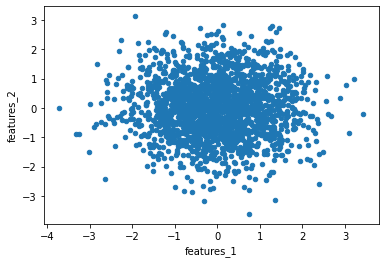

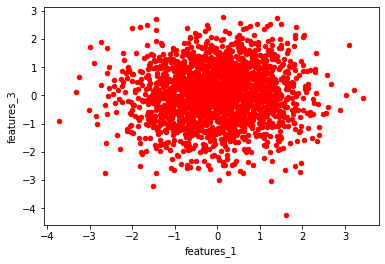

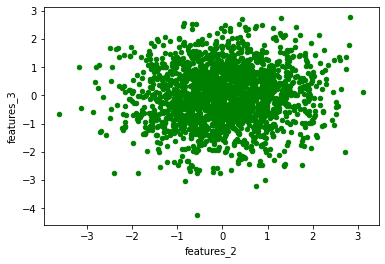

In [151]:
df.plot.scatter('features_1','features_2')
df.plot.scatter('features_1','features_3', color='red')
df.plot.scatter('features_2','features_3', color='green')